Exercise Sheet 9 **Support Vector Machines**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from numpy import linalg as LA


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


In [3]:
mm = np.matmul
npa = np.array
npmn = np.random.multivariate_normal
npuni = np.random.uniform
nprint = np.random.randint

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
def centering(x):
    xc = np.median(x, axis=0)
    return x - xc.reshape(1,2) # centered inputs

def whitening(x):
    x = x.T
    C = mm(x,x.T)/np.shape(x)[1]
    A, V = LA.eig(C) # A: Eigenvalues     V: Eigenvectors
    x = mm(V.T,x) # decorrelation
    return (np.sqrt(1/A).reshape(2,1)*x).T # whitening

def transform(x):
    # centring
    x = centering(x)
    # scaling the input to [-1,1]
    scaling = MinMaxScaler(feature_range=(-1,1))
    x = scaling.fit_transform(x)
    # whitening
    # x = whitening(x)
    return x


In [6]:
def sample_gen(p):
    p = int(np.round(p/2))
    I = np.identity(2)
    
    μ1 = npa([0,1]).T
    μ2 = npa([1,0]).T
    μ3 = npa([0,0]).T
    μ4 = npa([1,1]).T
    σ = 0.1 * I
    
    mvn1 = npmn(μ1, σ, p)
    mvn2 = npmn(μ2, σ, p)
    mvn3 = npmn(μ3, σ, p)
    mvn4 = npmn(μ4, σ, p)
    
    prob1 = nprint(0,2,(p,1),dtype='int')
    prob2 = nprint(0,2,(p,1),dtype='int')

    x1 = prob1*mvn1+(1-prob1)*mvn2
    y1 = np.full(p,-1)
    x2 = prob2*mvn3+(1-prob2)*mvn4
    y2 = np.full(p,1)
    
    x = np.concatenate((x1,x2),axis=0)
    y = np.concatenate((y1,y2))
    
    return x,y


**9.2: C-SVM with standard parameters**

In [7]:
x_train, y_train = sample_gen(80)
x_holdout, y_holdout = sample_gen(80)


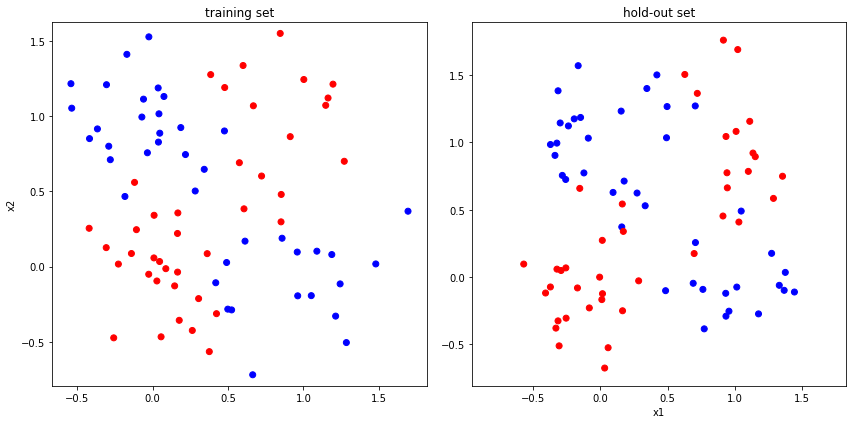

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap='bwr')
plt.ylabel('x2')
plt.axis('equal')
plt.title('training set')
plt.subplot(1,2,2)
plt.scatter(x_holdout[:,0],x_holdout[:,1],c=y_holdout,cmap='bwr')
plt.xlabel('x1')
plt.axis('equal')
plt.title('hold-out set')
plt.tight_layout()
plt.show()


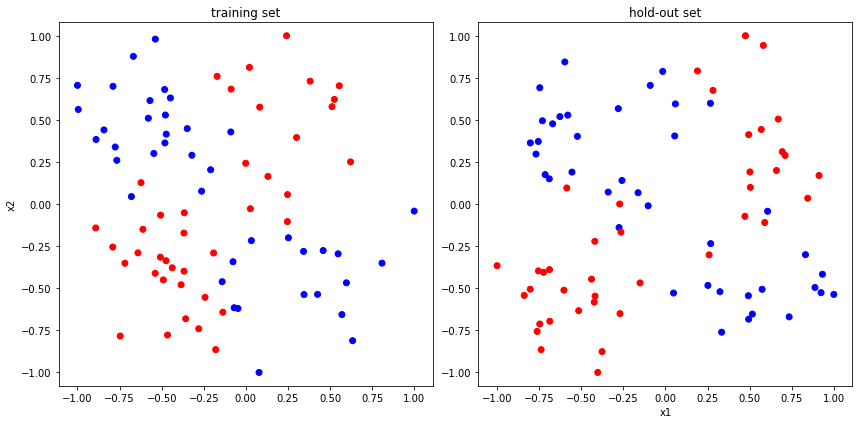

In [9]:
x_train = transform(x_train)
x_holdout = transform(x_holdout)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap='bwr')
plt.ylabel('x2')
plt.axis('equal')
plt.title('training set')
plt.subplot(1,2,2)
plt.scatter(x_holdout[:,0],x_holdout[:,1],c=y_holdout,cmap='bwr')
plt.xlabel('x1')
plt.axis('equal')
plt.title('hold-out set')
plt.tight_layout()
plt.show()


**Exercise H9.2**

In [10]:
svm_rbf_def = SVC(C=1.0,
          kernel='rbf',
          degree=3,
          gamma='auto',
          coef0=0.0,
          shrinking=True,
          probability=False,
          tol=0.001,
          cache_size=200,
          class_weight=None,
          verbose=False,
          max_iter=-1,
          decision_function_shape='ovr',
          random_state=None)

svm_rbf_def.fit(x_train, y_train)
print()


In [11]:
print('number of support vectors = %d'
      % (svm_rbf_def.n_support_[0]+svm_rbf_def.n_support_[1]))

y_predict = svm_rbf_def.predict(x_train)
false_prediction = 100*np.sum([y_predict != y_train])/(len(y_predict))
print('percentage of wrong predictions on training data = %.2f %%'
      % false_prediction)

y_predict = svm_rbf_def.predict(x_holdout)
false_prediction = 100*np.sum([y_predict != y_holdout])/(len(y_predict))
print('percentage of wrong predictions on hold-out data = %.2f %%'
      % false_prediction)

number of support vectors = 60
percentage of wrong predictions on training data = 13.75 %
percentage of wrong predictions on hold-out data = 18.75 %


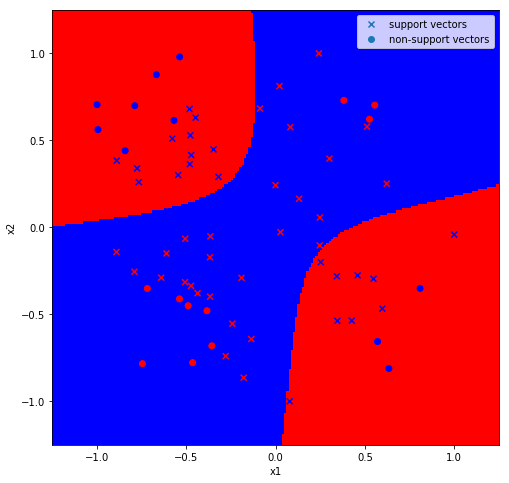

In [12]:
# recoloring the support vectors
sup_vec_i_def = svm_rbf_def.support_
sup_vectors_def = svm_rbf_def.support_vectors_
sup_labels_def = y_train[sup_vec_i_def]
non_sup_vectors_def = np.delete(np.copy(x_train),sup_vec_i_def,axis=0)
non_sup_labels_def = np.delete(np.copy(y_train),sup_vec_i_def)

# pre-plotting process
# xmin = np.floor(np.min(x_train[:,0]))
# xmax = np.ceil(np.max(x_train[:,0]))
# ymin = np.floor(np.min(x_train[:,1]))
# ymax = np.ceil(np.max(x_train[:,1]))
xmin = -1.25
xmax = 1.25
ymin = -1.25
ymax = 1.25
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 201),
                     np.linspace(ymin, ymax, 201))
Z_def = svm_rbf_def.decision_function(np.c_[xx.ravel(), yy.ravel()])
ZZ_def = Z_def.reshape(xx.shape)

# plotting
plt.figure(figsize=(8,8))
plt.pcolormesh(xx, yy, -ZZ_def>0, cmap='bwr')
plt.scatter(sup_vectors_def[:,0],sup_vectors_def[:,1],
            c=sup_labels_def,cmap='bwr',marker='x',
            label='support vectors')
plt.scatter(non_sup_vectors_def[:,0],non_sup_vectors_def[:,1],
            c=non_sup_labels_def,cmap='bwr',marker='o',
            label='non-support vectors')
plt.legend()
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


**9.3: C-SVM parameter optimization**

In [13]:
# the steps of one is considered for better search
C_range = np.logspace(-6,10,17,endpoint=True,base=2)
γ_range = np.logspace(-5,9,15,endpoint=True,base=2)


In [14]:
# grid search
param_grid = dict(gamma=γ_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.8,random_state=5)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(x_train, y_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))


The best parameters are {'C': 8.0, 'gamma': 4.0} with a score of 0.81


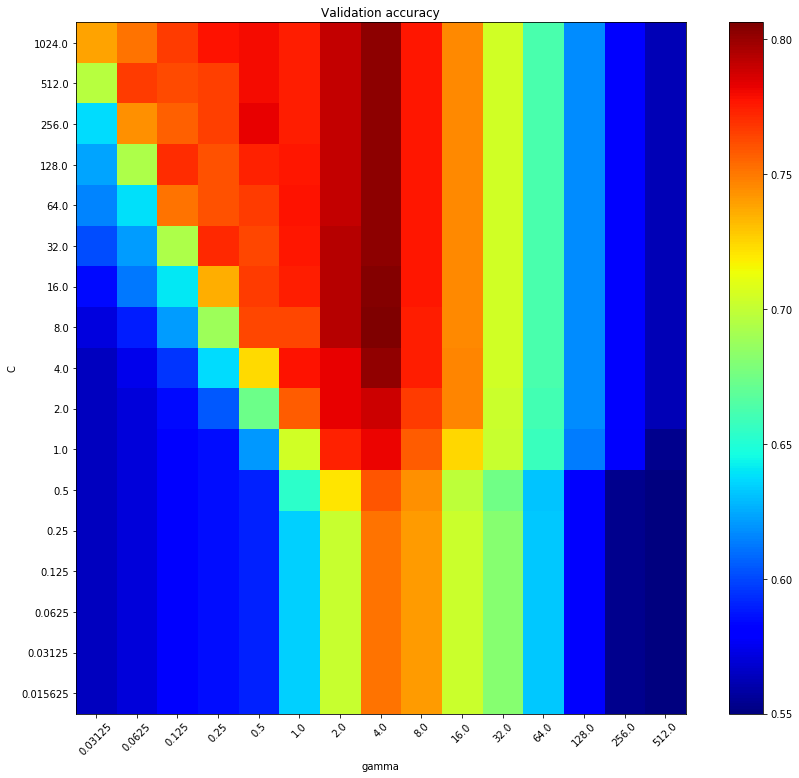

In [15]:
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(γ_range))
plt.figure(figsize=(16, 12))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap='jet',
           origin='lower')
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(γ_range)), γ_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()


In [16]:
# grid search resulting best parameters
opt_gamma = grid.best_params_['gamma']
opt_C = grid.best_params_['C']


In [17]:
svm_rbf_opt = SVC(
          C=opt_C,
          kernel='rbf',
          degree=3,
          gamma=opt_gamma,
          coef0=0.0,
          shrinking=True,
          probability=False,
          tol=0.001,
          cache_size=200,
          class_weight=None,
          verbose=False,
          max_iter=-1,
          decision_function_shape='ovr',
          random_state=None)

svm_rbf_opt.fit(x_train, y_train)

print('number of support vectors = %d'
      % (svm_rbf_opt.n_support_[0]+svm_rbf_opt.n_support_[1]))

y_predict = svm_rbf_opt.predict(x_train)
false_prediction = 100*np.sum([y_predict != y_train])/(len(y_predict))
print('percentage of wrong predictions on training data = %.2f %%'
      % false_prediction)

y_predict = svm_rbf_opt.predict(x_holdout)
false_prediction = 100*np.sum([y_predict != y_holdout])/(len(y_predict))
print('percentage of wrong predictions on hold-out data = %.2f %%'
      % false_prediction)


number of support vectors = 27
percentage of wrong predictions on training data = 3.75 %
percentage of wrong predictions on hold-out data = 18.75 %


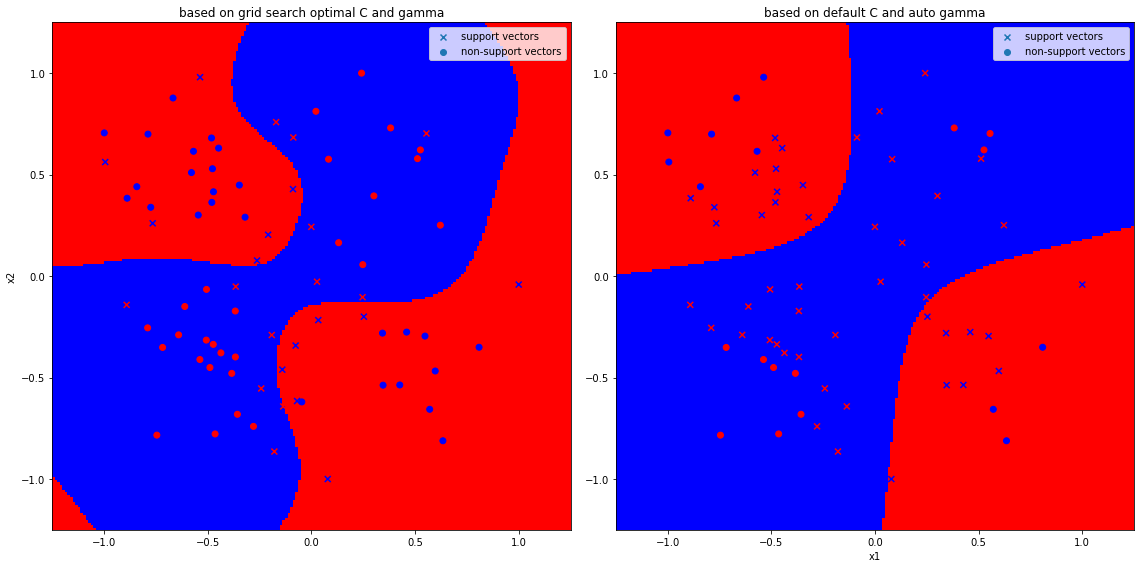

In [18]:
# recoloring the support vectors
sup_vec_i_opt = svm_rbf_opt.support_
sup_vectors_opt = svm_rbf_opt.support_vectors_
sup_labels_opt = y_train[sup_vec_i_opt]
non_sup_vectors_opt = np.delete(np.copy(x_train),sup_vec_i_opt,axis=0)
non_sup_labels_opt = np.delete(np.copy(y_train),sup_vec_i_opt)

# pre-plotting
Z_opt = svm_rbf_opt.decision_function(np.c_[xx.ravel(), yy.ravel()])
ZZ_opt = Z_opt.reshape(xx.shape)

# plotting
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.pcolormesh(xx, yy, -ZZ_opt>0, cmap='bwr')
plt.scatter(sup_vectors_opt[:,0],sup_vectors_opt[:,1],
            c=sup_labels_opt,cmap='bwr',marker='x',
            label='support vectors')
plt.scatter(non_sup_vectors_opt[:,0],non_sup_vectors_opt[:,1],
            c=non_sup_labels_opt,cmap='bwr',marker='o',
            label='non-support vectors')
plt.legend()
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.ylabel('x2')
plt.title('based on grid search optimal C and gamma')
plt.subplot(1,2,2)
plt.pcolormesh(xx, yy, -ZZ_def>0, cmap='bwr')
plt.scatter(sup_vectors_def[:,0],sup_vectors_def[:,1],
            c=sup_labels_def,cmap='bwr',marker='x',
            label='support vectors')
plt.scatter(non_sup_vectors_def[:,0],non_sup_vectors_def[:,1],
            c=non_sup_labels_def,cmap='bwr',marker='o',
            label='non-support vectors')
plt.legend()
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xlabel('x1')
plt.title('based on default C and auto gamma')
plt.tight_layout()
plt.show()



In [19]:
# deviding gamma by 4
svm_rbf_opt = SVC(
          C=opt_C,
          kernel='rbf',
          degree=3,
          gamma=opt_gamma/4,
          coef0=0.0,
          shrinking=True,
          probability=False,
          tol=0.001,
          cache_size=200,
          class_weight=None,
          verbose=False,
          max_iter=-1,
          decision_function_shape='ovr',
          random_state=None)

svm_rbf_opt.fit(x_train, y_train)

print('number of support vectors = %d'
      % (svm_rbf_opt.n_support_[0]+svm_rbf_opt.n_support_[1]))

y_predict = svm_rbf_opt.predict(x_train)
false_prediction = 100*np.sum([y_predict != y_train])/(len(y_predict))
print('percentage of wrong predictions on training data = %.2f %%'
      % false_prediction)

y_predict = svm_rbf_opt.predict(x_holdout)
false_prediction = 100*np.sum([y_predict != y_holdout])/(len(y_predict))
print('percentage of wrong predictions on hold-out data = %.2f %%'
      % false_prediction)


number of support vectors = 31
percentage of wrong predictions on training data = 10.00 %
percentage of wrong predictions on hold-out data = 18.75 %


In [20]:
# deviding C by
svm_rbf_opt = SVC(
          C=opt_C/4,
          kernel='rbf',
          degree=3,
          gamma=opt_gamma,
          coef0=0.0,
          shrinking=True,
          probability=False,
          tol=0.001,
          cache_size=200,
          class_weight=None,
          verbose=False,
          max_iter=-1,
          decision_function_shape='ovr',
          random_state=None)

svm_rbf_opt.fit(x_train, y_train)

print('number of support vectors = %d'
      % (svm_rbf_opt.n_support_[0]+svm_rbf_opt.n_support_[1]))

y_predict = svm_rbf_opt.predict(x_train)
false_prediction = 100*np.sum([y_predict != y_train])/(len(y_predict))
print('percentage of wrong predictions on training data = %.2f %%'
      % false_prediction)

y_predict = svm_rbf_opt.predict(x_holdout)
false_prediction = 100*np.sum([y_predict != y_holdout])/(len(y_predict))
print('percentage of wrong predictions on hold-out data = %.2f %%'
      % false_prediction)


number of support vectors = 34
percentage of wrong predictions on training data = 6.25 %
percentage of wrong predictions on hold-out data = 17.50 %


---  
using default parameters:  
number of support vectors = 60  
percentage of wrong predictions on training data = 13.75 %  
percentage of wrong predictions on hold-out data = 18.75 %  

grid search optimal parameters:  
number of support vectors = 27  
percentage of wrong predictions on training data = 3.75 %  
percentage of wrong predictions on hold-out data = 18.75 %  

Finally,  
Dividing optimal gamma by 4, the number of support vectors used increases. In general, with smaller gamma, many more support vectors are chosen. With very small gamma, our SVM will behave similarly to a linear model, not adequately capturing the complexity of the data. Gamma can be seen a parameters proportional to smoothness of the decision boundary. Furthermore, for very large gamma (in our case 2^9), the radius around chosen support vectors becomes small enough to only enclose the support vector itself. The test accuracy of the SVM remains about the same for every C, representing the gamma threshold above which no amount of regularization will prevent overfitting on the training data.  
When we divide our optimal C by 4, we increase the size of our margins. Our C can be interpreted as our regularization parameter, which, by decreasing, we create an SVM with better generalizability at the cost of training accuracy. In this case, our accuracy on both test and training data only drops by 1-2%. We consider ourselves lucky and may, it some cases, take the trade-off for increased generalizability.

**Bonus**

In [21]:
# classifiers = []
# for C in C_range:
#     for gamma in γ_range:
#         clf = SVC(C=C, gamma=gamma)
#         clf.fit(x_train, y_train)
#         classifiers.append((C, gamma, clf))

In [22]:
# ZZ = []
# for (k, (C, gamma, clf)) in enumerate(classifiers):
#     # evaluate decision function in a grid
#     Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     ZZ.append([Z,gamma,C])

# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111, autoscale_on=False,
#                      xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
# ax.grid()
# plt.xticks(())
# plt.yticks(())

# x0 = np.empty((2))
# y0 = np.empty((2))
# z0 = np.empty((2,2))
# xx, yy = np.meshgrid(np.linspace(xmin, xmax, 201),
#                      np.linspace(ymin, ymax, 201))


# contours = ax.contour(x0, y0, z0)
# plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# plt.axis('equal')
# plt.xlim(xmin,xmax)
# plt.ylim(ymin,ymax)

# def init():
#     contours = ax.contour(x0, y0, z0)
#     ax.set_title('gamma=10^%d, C=10^%d' % (0,0))
#     return contours

# def animate(i):
#     ax.clear()
#     ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
#     thisz = -ZZ[i][0]
#     thisgamma = np.log2(ZZ[i][1])
#     thisc = np.log2(ZZ[i][2])
#     contours = ax.contour(xx, yy, thisz)
#     ax.set_title('gamma=10^%d, C=10^%d' % (thisgamma,thisc))
#     return contours


# ani = animation.FuncAnimation(fig, animate,
#                               np.arange(1, len(C_range)*len(γ_range)),
#                               interval=200, blit=False, init_func=init)

# plt.show()    


In [23]:
# HTML(ani.to_jshtml())